# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

> ## Data

In [1]:
import pandas as pd
import numpy as np

In [5]:
bankloan = pd.read_csv('../data/bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [7]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [8]:
X = bankloan[fitur]
y = bankloan[target]

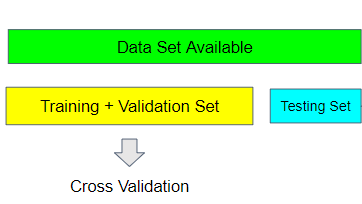

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

> ## Model Evaluation : Benchmark

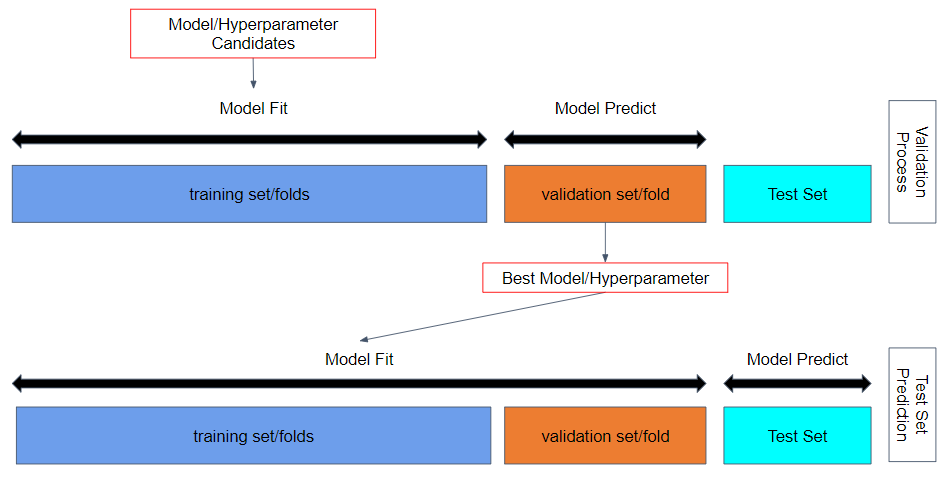

In [10]:
# model benchmark
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### Accuracy

In [12]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold)

In [13]:
print('CV Logreg:', logreg_cv)
print('CV KNN:', knn_cv)
print('CV DTC:', tree_cv)

CV Logreg: [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV KNN: [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV DTC: [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


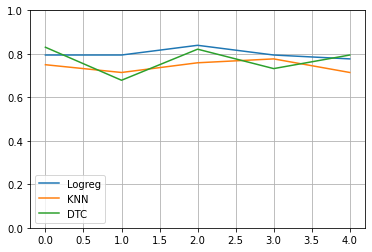

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(len(logreg_cv)), logreg_cv, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv, label='KNN')
plt.plot(range(len(tree_cv)), tree_cv, label='DTC')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [14]:
print('CV Logreg:', logreg_cv.mean())
print('CV KNN:', knn_cv.mean())
print('CV DTC:', tree_cv.mean())

CV Logreg: 0.8
CV KNN: 0.7428571428571429
CV DTC: 0.7714285714285716


In [15]:
print('CV Logreg:', logreg_cv.std())
print('CV KNN:', knn_cv.std())
print('CV DTC:', tree_cv.std())

CV Logreg: 0.020824828195876083
CV KNN: 0.024872121923543065
CV DTC: 0.057753434388557956


### Recall

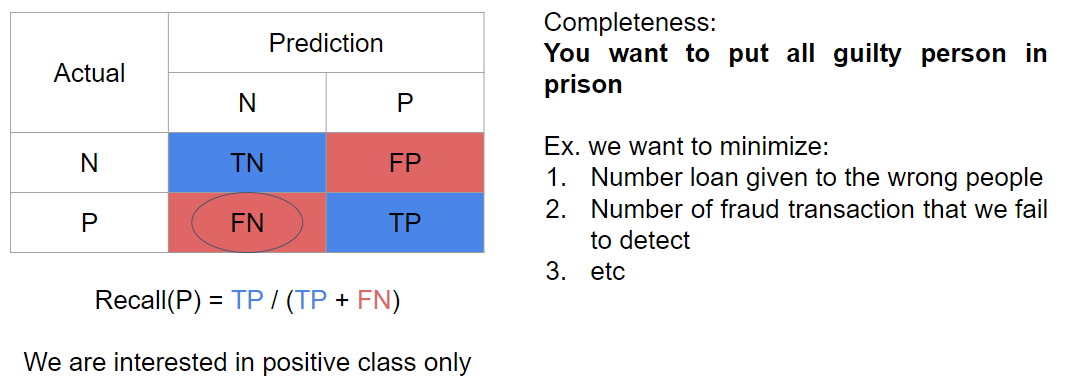

In [21]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_rc = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='recall')
knn_cv_rc = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='recall')
tree_cv_rc = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [22]:
print('CV Logreg:', logreg_cv_rc)
print('CV KNN:', knn_cv_rc)
print('CV DTC:', tree_cv_rc)

CV Logreg: [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV KNN: [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV DTC: [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


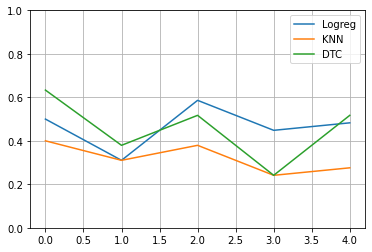

In [23]:
plt.plot(range(len(logreg_cv_rc)), logreg_cv_rc, label='Logreg')
plt.plot(range(len(knn_cv_rc)), knn_cv_rc, label='KNN')
plt.plot(range(len(tree_cv_rc)), tree_cv_rc, label='DTC')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [24]:
print('CV Logreg:', logreg_cv_rc.mean())
print('CV KNN:', knn_cv_rc.mean())
print('CV DTC:', tree_cv_rc.mean())

CV Logreg: 0.46551724137931033
CV KNN: 0.3213793103448276
CV DTC: 0.4577011494252874


In [25]:
print('CV Logreg:', logreg_cv_rc.std())
print('CV KNN:', knn_cv_rc.std())
print('CV DTC:', tree_cv_rc.std())

CV Logreg: 0.08992003317520893
CV KNN: 0.06021759987018779
CV DTC: 0.13481616986286768


### Flexible Metrics

In [26]:
skfold = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver='liblinear', random_state=2020)
metric = 'f1'

def model_evaluation_cv(model, metric, fold):
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = fold, scoring = metric)
    return model_cv

In [27]:
def print_result(model_cv):
    print('CV Score:', model_cv)
    print('CV Score mean:', model_cv.mean())
    print('CV Score std:', model_cv.std())

In [28]:
model_cv = model_evaluation_cv(model, metric, skfold)
model_cv

array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])

In [29]:
print_result(model_cv)

CV Score: [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV Score mean: 0.543564482325905
CV Score std: 0.06927688261828344


### Cross Validate

In [33]:
from sklearn.model_selection import cross_validate
model_cv = cross_validate(model, X_train_val, y_train_val, cv = skfold, scoring = ['precision', 'recall', 'accuracy', 'f1'])
model_cv

{'fit_time': array([0.00997186, 0.00897503, 0.00997233, 0.0204618 , 0.01297617]),
 'score_time': array([0.01495838, 0.0149622 , 0.01296639, 0.01795173, 0.01694322]),
 'test_precision': array([0.65217391, 0.75      , 0.73913043, 0.65      , 0.58333333]),
 'test_recall': array([0.5       , 0.31034483, 0.5862069 , 0.44827586, 0.48275862]),
 'test_accuracy': array([0.79464286, 0.79464286, 0.83928571, 0.79464286, 0.77678571]),
 'test_f1': array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])}

In [43]:
cv_df = pd.DataFrame(model_cv, index=[f'fold_{x}' for x in range(1,6)])
cv_df

,fit_time,score_time,test_precision,test_recall,test_accuracy,test_f1
fold_1,0.009972,0.014958,0.652174,0.500000,0.794643,0.566038
fold_2,0.008975,0.014962,0.750000,0.310345,0.794643,0.439024
fold_3,0.009972,0.012966,0.739130,0.586207,0.839286,0.653846
fold_4,0.020462,0.017952,0.650000,0.448276,0.794643,0.530612
fold_5,0.012976,0.016943,0.583333,0.482759,0.776786,0.528302


In [46]:
cv_df['test_precision'].std()

0.06943791189606445

### Model Performance in Test Set

In [39]:
model

LogisticRegression(random_state=2020, solver='liblinear')

In [40]:
model.fit(X_train_val, y_train_val)

LogisticRegression(random_state=2020, solver='liblinear')

In [41]:
y_pred = model.predict(X_test)

In [42]:
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

recall: 0.4864864864864865
precision: 0.782608695652174
f1: 0.6000000000000001


In [44]:
cv_df.describe()

,fit_time,score_time,test_precision,test_recall,test_accuracy,test_f1
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.012471,0.015556,0.674928,0.465517,0.800000,0.543564
std,0.004712,0.001942,0.069438,0.100534,0.023283,0.077454
min,0.008975,0.012966,0.583333,0.310345,0.776786,0.439024
25%,0.009972,0.014958,0.650000,0.448276,0.794643,0.528302
50%,0.009972,0.014962,0.652174,0.482759,0.794643,0.530612
75%,0.012976,0.016943,0.739130,0.500000,0.794643,0.566038
max,0.020462,0.017952,0.750000,0.586207,0.839286,0.653846


In [56]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.84      0.95      0.89       103
    Positive       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [51]:
# precision(+)
precision_score(y_test, y_pred, pos_label=1)

0.782608695652174

In [52]:
# precision(-)
precision_score(y_test, y_pred, pos_label=0)

0.8376068376068376

In [54]:
f1_score(y_test, y_pred, pos_label=0)

0.8909090909090909

In [48]:
# macro
(0.84+0.78)/2

0.81

In [50]:
# weighted
(((103/140)*0.84)+((37/140)*0.78))

0.8241428571428572

In [61]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve

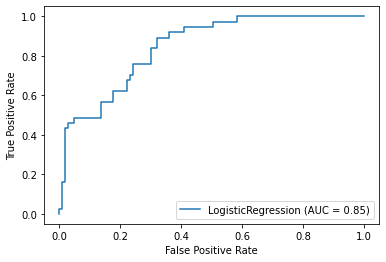

In [58]:
plot_roc_curve(model, X_test, y_test)
plt.show()

In [65]:
y_prob1 = model.predict_proba(X_test)[:,1]
y_prob1
roc_auc_score(y_test, y_prob1)

0.8475465757019154

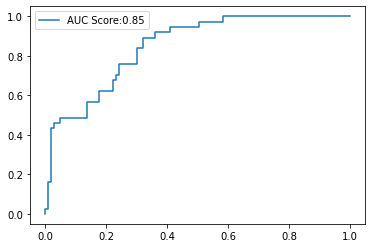

In [74]:
fpr, tpr, thr = roc_curve(y_test, y_prob1)
plt.plot(fpr, tpr)
plt.legend([f'AUC Score:{round(roc_auc_score(y_test, y_prob1),2)}'])

In [96]:
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thr': thr})
roc_df[roc_df['tpr']>0.8].sort_values('fpr')

,fpr,tpr,thr
21,0.300971,0.837838,0.269020
22,0.320388,0.837838,0.260175
23,0.320388,0.891892,0.254902
24,0.359223,0.891892,0.226951
25,0.359223,0.918919,0.219228
26,0.407767,0.918919,0.188749
27,0.407767,0.945946,0.181573
28,0.504854,0.945946,0.143030
29,0.504854,0.972973,0.135471
30,0.582524,0.972973,0.105802


In [85]:
len(y_prob1)
y_test
# len(y_pred)

,default
118,1
309,0
339,1
686,0
639,0
...,...
597,1
58,0
467,0
148,0


In [98]:
new_thr = 0.254902
y_pred = model.predict(X_test) # threshold 0.5
y_pred025 = [1 if i > new_thr else 0 for i in model.predict_proba(X_test)[:,1]] # threshold 0.254902
prob_df = pd.DataFrame({'prob_1': y_prob1, 'y_pred_nt': y_pred025, 'y_pred': y_pred})
prob_df.head()

,prob_1,y_pred_nt,y_pred
0,0.591712,1,1
1,0.314290,1,0
2,0.310958,1,0
3,0.409367,1,0
4,0.240005,0,0


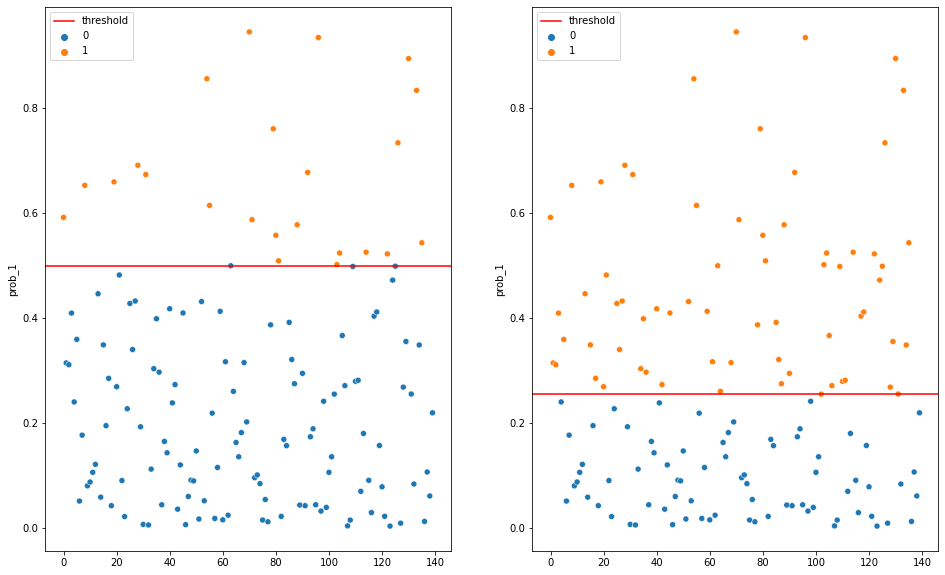

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       103
           1       0.50      0.89      0.64        37

    accuracy                           0.74       140
   macro avg       0.72      0.79      0.72       140
weighted avg       0.83      0.74      0.75       140



In [100]:
import seaborn as sns
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred'])
plt.axhline(0.5, color='red', label='threshold')
plt.legend()

plt.subplot(122)
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred_nt'])
plt.axhline(new_thr, color='red', label='threshold')
plt.legend()

plt.show()

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred025))

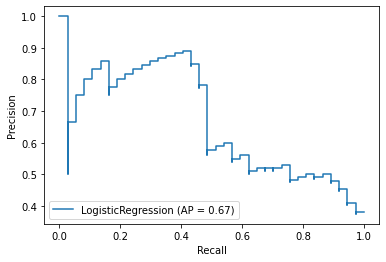

In [60]:
plot_precision_recall_curve(model, X_test, y_test)
plt.show()